# ACML Assignment 1

In [2]:
import numpy as np

### Create the training data 

In [3]:
inputs = []

for i in range(8):
    input = np.zeros(((8+1),1)) # +1 is the bias
    input[0] = 1 # bias at the beginning of the input
    input[i+1] = 1
    inputs.append(input)

#print(inputs[0:2])
#len(inputs)

### Initialize Weights

In [4]:
# Weights
W1 = np.random.normal(0, 0.1, 3*9).reshape(3, 9) # 3x9 matrix
W2 = np.random.normal(0, 0.1, 8*4).reshape(8, 4) # 8x4 matrix

### Initialize Hyperparameters

In [5]:
# implement the weight adjustment
lr = 0.1
batch_size = 8
weight_decay = 0.000001
epochs = 1000

### Define functions

In [6]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

def softmax(x):
    e = np.exp(x)
    return(e/e.sum())

def argmax(x): 
    a2_index = np.argmax(x)
    a2 = np.zeros(8)
    a2[a2_index] = 1
    return(a2)


# forward propagation function
# a0 is the input layer, which must be of shape (9,1) (8+1)
# returns the activations of layer 1 and 2
def forward_prop(a0):
    a1 = sigmoid(np.dot(W1, a0)) # (3x9) . (9x1) = (3x1)
    a1 = np.insert(a1, 0, 1) # insert bias to make it (4x1)
    a2 = softmax(np.dot(W2, a1))
    return(a1, a2) # returns (4x1) and (8x1)

# back propagation function
# inputs are: a0 (=y), a1, a2 (activation of layer 1 and 2)
# outputs are:
def back_prop(a0, a1, a2):
    
    # compute the costs (squared error)
    cost_MSE = np.sum(np.square(a2 - a0))

    # compute the deltas for layer 2 and 1
    delta2 = a2 * (np.ones(8) - a2) * (a2 - a0) # deltas in layer 2 (output)
    #       (8x1) * ((8x1) - (8x1)) * ((8x1)-(8x1)) = (8x1)

    print("a2", a2)
    print("a0", a0)

    delta1 = a1 * (np.ones(4) - a1) * np.dot(W2.T, delta2) # deltas in layer 1 (hidden)
    #         (4x1) * ((4x1) - (4x1))  *  ((4x8) . (8x1))   = (4x1)
    #                                          (4x1)
    #print(a2)
    #print(a2.reshape(-1,1))


    # compute the partial derivatives for weigthts 2
    print("a1", a1.reshape(4,1))
    print("delta2", delta2)
    deriv_W_2 = np.dot(delta2.reshape(8,1), a1.reshape(1,4))


    # compute the partial derivatives for weights 1
    # insert bias to a0
    a0_with_bias = np.insert(a0, 0, 1)
    a0_with_bias = a0_with_bias.reshape(1, 9)
    
    # delete bias for delta1
    delta1 = np.delete(delta1, 0)
    #print(a0_with_bias)
    #print(delta1)
    deriv_W_1 = np.dot(delta1.reshape(3, 1), a0_with_bias)

    #print(deriv_W_1.shape, deriv_W_2.shape)   
    return(deriv_W_1, deriv_W_2, cost_MSE)


In [7]:
print(inputs[0])

# activations of layer 1 and 2
ta1, ta2 = forward_prop(inputs[0])

y = np.delete(inputs[0], 0)
print("y", y)
der1, der2, cost= back_prop(y, ta1, ta2)

print("activations of layer 1 and 2")
print(ta1, ta2)
print("derivatives of the weights W1 and W2")
der1, der2

[[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
y [1. 0. 0. 0. 0. 0. 0. 0.]
a2 [0.11415141 0.13338322 0.12787473 0.14423256 0.09557927 0.1220285
 0.13389757 0.12885273]
a0 [1. 0. 0. 0. 0. 0. 0. 0.]
a1 [[1.        ]
 [0.52890169]
 [0.46950065]
 [0.54888052]]
delta2 [-0.08957778  0.01541805  0.01426095  0.01780256  0.00826224  0.01307383
  0.01552797  0.01446368]
activations of layer 1 and 2
[1.         0.52890169 0.46950065 0.54888052] [0.11415141 0.13338322 0.12787473 0.14423256 0.09557927 0.1220285
 0.13389757 0.12885273]
derivatives of the weights W1 and W2


(array([[0.00218182, 0.00218182, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.00066197, 0.00066197, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.00092812, 0.00092812, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ]]),
 array([[-0.08957778, -0.04737784, -0.04205682, -0.0491675 ],
        [ 0.01541805,  0.00815463,  0.00723879,  0.00846267],
        [ 0.01426095,  0.00754264,  0.00669552,  0.00782756],
        [ 0.01780256,  0.0094158 ,  0.00835831,  0.00977148],
        [ 0.00826224,  0.00436991,  0.00387913,  0.00453498],
        [ 0.01307383,  0.00691477,  0.00613817,  0.00717597],
        [ 0.01552797,  0.00821277,  0.00729039,  0.008523  ],
        [ 0.01446368,  0.00764987,  0.00679071,  0.00793883]]))

In [8]:
loss = list()
# loop over number of iterations
for i in range(epochs):

    # loop over batch size
    deriv1_outer = np.zeros((3,9))
    deriv2_outer = np.zeros((8,4))
    for m in range(batch_size): #batch size 8
        
        # select a random training sample
        train_sample = inputs[np.random.randint(0, 8)]
        
        # perform forward propagation
        ta1, ta2 = forward_prop(train_sample)
        
        # perform backward propagation
        y = np.delete(train_sample, 0)
        deriv1, deriv2, cost = back_prop(y, ta1, ta2)
        
        # add the partial derivatives to the batch derivatives
        #print(deriv1.shape, deriv1_outer.shape)
        deriv1_outer = deriv1_outer + deriv1
        deriv2_outer = deriv2_outer + deriv2
        loss.append(cost)

    W1_new = W1 - (lr * ((1/batch_size) * deriv1_outer + weight_decay * W1))
    W2_new = W2 - (lr * ((1/batch_size) * deriv2_outer + weight_decay * W2))
    W1_new[:,0] = W1[:,0] - lr * (1/batch_size) * deriv1_outer[:,0]
    W2_new[:,0] = W2[:,0] - lr * (1/batch_size) * deriv2_outer[:,0]
    W1 = W1_new
    W2 = W2_new



a2 [0.11388139 0.13418832 0.12733326 0.14451686 0.09487139 0.12155918
 0.13434999 0.12929961]
a0 [0. 0. 1. 0. 0. 0. 0. 0.]
a1 [[1.        ]
 [0.54992308]
 [0.51004311]
 [0.54299716]]
delta2 [ 0.01149205  0.01559024 -0.09697029  0.01786687  0.00814668  0.0129804
  0.01562491  0.01455671]
a2 [0.11431689 0.13318898 0.12812471 0.14403747 0.09601221 0.12214441
 0.13357598 0.12859935]
a0 [0. 1. 0. 0. 0. 0. 0. 0.]
a1 [[1.        ]
 [0.51086765]
 [0.45453686]
 [0.55746171]]
delta2 [ 0.01157442 -0.10007305  0.01431265  0.01775848  0.00833327  0.01309695
  0.01545921  0.01441104]
a2 [0.11415141 0.13338322 0.12787473 0.14423256 0.09557927 0.1220285
 0.13389757 0.12885273]
a0 [1. 0. 0. 0. 0. 0. 0. 0.]
a1 [[1.        ]
 [0.52890169]
 [0.46950065]
 [0.54888052]]
delta2 [-0.08957778  0.01541805  0.01426095  0.01780256  0.00826224  0.01307383
  0.01552797  0.01446368]
a2 [0.11362603 0.13375403 0.12735151 0.14481081 0.09453511 0.12209696
 0.13436506 0.12946049]
a0 [0. 0. 0. 0. 0. 0. 1. 0.]
a1 [[1.     

In [9]:
W2
W1[:,0]

array([ 0.16355311, -0.0447438 ,  0.19753256])

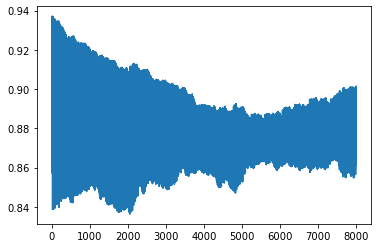

In [10]:
import matplotlib.pyplot as plt

plt.plot((list(range(len(loss)))), loss)
plt.show()

In [89]:
print(inputs[1])

_, output = forward_prop(inputs[1])

print(output)




[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[0. 0. 0. 1. 0. 0. 0. 0.]
